<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Initial-Data-Processing-&amp;-Visualizations" data-toc-modified-id="Initial-Data-Processing-&amp;-Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Processing &amp; Visualizations</a></span><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set Up</a></span><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Imports and Functions</a></span></li><li><span><a href="#Isolating-Areas-of-Interest" data-toc-modified-id="Isolating-Areas-of-Interest-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Isolating Areas of Interest</a></span></li></ul></li><li><span><a href="#Existing-Rooftop-Solar-Installations" data-toc-modified-id="Existing-Rooftop-Solar-Installations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Existing Rooftop Solar Installations</a></span><ul class="toc-item"><li><span><a href="#Basic-Metrics-Bar-Plots" data-toc-modified-id="Basic-Metrics-Bar-Plots-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Basic Metrics Bar Plots</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Maps</a></span></li></ul></li><li><span><a href="#Solar-Potential" data-toc-modified-id="Solar-Potential-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Solar Potential</a></span><ul class="toc-item"><li><span><a href="#How-the-Towns-Compare-Overall" data-toc-modified-id="How-the-Towns-Compare-Overall-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>How the Towns Compare Overall</a></span></li><li><span><a href="#Adding-a-Rooftop-Layer" data-toc-modified-id="Adding-a-Rooftop-Layer-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Adding a Rooftop Layer</a></span></li><li><span><a href="#Solar-Energy-Potential-per-Rooftop" data-toc-modified-id="Solar-Energy-Potential-per-Rooftop-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Solar Energy Potential per Rooftop</a></span></li></ul></li><li><span><a href="#Financial-Data" data-toc-modified-id="Financial-Data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Financial Data</a></span><ul class="toc-item"><li><span><a href="#Block-Group-Income-Data-for-Areas-of-Interest" data-toc-modified-id="Block-Group-Income-Data-for-Areas-of-Interest-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Block Group Income Data for Areas of Interest</a></span></li><li><span><a href="#From-Income-Ranges-to-Weighted-Averages" data-toc-modified-id="From-Income-Ranges-to-Weighted-Averages-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>From Income Ranges to Weighted Averages</a></span></li><li><span><a href="#State-&amp;-Federal-Income-Tax-Estimates" data-toc-modified-id="State-&amp;-Federal-Income-Tax-Estimates-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>State &amp; Federal Income Tax Estimates</a></span></li><li><span><a href="#Visualizing-Financial-Data" data-toc-modified-id="Visualizing-Financial-Data-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Visualizing Financial Data</a></span></li><li><span><a href="#Combining-Block-Groups-&amp;-Rooftop-Irradiance-Data" data-toc-modified-id="Combining-Block-Groups-&amp;-Rooftop-Irradiance-Data-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Combining Block Groups &amp; Rooftop Irradiance Data</a></span></li></ul></li><li><span><a href="#Avoided-Emissions" data-toc-modified-id="Avoided-Emissions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Avoided Emissions</a></span></li></ul></li><li><span><a href="#Analysis-of-Incentives" data-toc-modified-id="Analysis-of-Incentives-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis of Incentives</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Estimating-Cost-of-Installation" data-toc-modified-id="Estimating-Cost-of-Installation-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Estimating Cost of Installation</a></span></li><li><span><a href="#When-is-PV-Installation-Economical?" data-toc-modified-id="When-is-PV-Installation-Economical?-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>When is PV Installation Economical?</a></span></li></ul></li><li><span><a href="#State-&amp;-Federal-Tax-Incentives" data-toc-modified-id="State-&amp;-Federal-Tax-Incentives-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>State &amp; Federal Tax Incentives</a></span><ul class="toc-item"><li><span><a href="#Calculations" data-toc-modified-id="Calculations-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Calculations</a></span></li></ul></li></ul></li></ul></div>

## Background

## Initial Data Processing & Visualizations

### Set Up

#### Imports and Functions

In [2]:
# Define functions for data & viz output locations

def dataDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/data/' + x

def outputDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/output/' + x

In [3]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# import rioxarray as rxr                  # contextlib error
from rasterstats import zonal_stats
from rasterio import open as r_open
from rasterio.plot import show as r_show 
from subprocess import Popen
# from qgis import processing

%matplotlib inline

#### Isolating Areas of Interest

In [4]:
# Read MA zip codes shape file

zipsMA = gpd.read_file(dataDir('MAshape/ZIPCODES_NT_POLY.shp'))
zipsMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.601 930766.133, 147572.846 93..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.244 882113.238, 101989.263 88..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.967 933358.562, 106787.233 93..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.642 914027.911, 77229.987 9120..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990 830521.900, 242901.505 83..."
...,...,...,...,...,...,...,...,...,...,...,...
544,01107,SPRINGFIELD,NON UNIQUE,SPRINGFIELD,67000,SPRINGFIELD,HAMPDEN,1.498634,3.881445e+06,10376.718676,"POLYGON ((107846.667 873744.759, 107748.271 87..."
545,02143,SOMERVILLE,NON UNIQUE,SOMERVILLE,62535,SOMERVILLE,MIDDLESEX,1.496683,3.876392e+06,10257.447499,"POLYGON ((234515.542 903600.882, 234513.546 90..."
546,02126,MATTAPAN,NON UNIQUE,MATTAPAN,07000,BOSTON,SUFFOLK,1.913063,4.954811e+06,11393.855139,"POLYGON ((235583.548 891243.299, 235517.614 89..."
547,02723,FALL RIVER,NON UNIQUE,FALL RIVER,23000,FALL RIVER,BRISTOL,1.848472,4.787521e+06,10099.578308,"POLYGON ((231623.910 825614.571, 231616.540 82..."


In [5]:
# Isolate Newton, Milton, Hyde Park, and West Roxbury

isolMA = zipsMA.loc[(zipsMA['PC_NAME'].isin(['MILTON', 'HYDE PARK', 'WEST ROXBURY'])) |
                   (zipsMA['CITY_TOWN'].eq('NEWTON'))]
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.098405,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.005897,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.132747,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.748247,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.394419,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.388591,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


<AxesSubplot:>

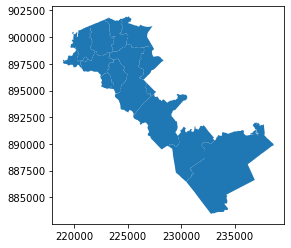

In [6]:
# Plot the areas

isolMA.plot()

In [7]:
# Create unions of the multiple polygons in Newton, Hyde Park, and Milton

milton1 = isolMA.loc[310, 'geometry'][0]
milton2 = isolMA.loc[310, 'geometry'][1]

polyNewton = gpd.GeoDataFrame(geometry=isolMA[isolMA['CITY_TOWN'].eq('NEWTON')]['geometry'])
polyMilton = gpd.GeoDataFrame(geometry=[milton1, milton2])
polyHP     = gpd.GeoDataFrame(geometry=isolMA[isolMA['PC_NAME'].eq('HYDE PARK')]['geometry'])

polyNewton = polyNewton.set_index(pd.Index([i for i in range(len(polyNewton))]))
polyMilton = polyMilton.set_index(pd.Index([0, 1]))
polyHP     = polyHP.set_index(pd.Index([0, 1]))

polyNewton = polyNewton['geometry']
polyMilton = polyMilton['geometry']
polyHP     = polyHP['geometry']

In [8]:
def polyUnion(polyList):
    
    res = polyList.loc[0]
    
    for i in range(1, len(polyList)):
        res = res.union(polyList.loc[i])
        
    return res

In [9]:
newtonAll = polyUnion(polyNewton)
newton    = ['02456', 'NEWTON', 'AGG', 'NEWTON', 'NA', 'NEWTON', 'MIDDLESEX', 
            'NA', newtonAll.area, newtonAll.length, newtonAll]


isolMA.loc[0] = newton
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [10]:
miltonAll = polyUnion(polyMilton)
milton    = ['02186', 'MILTON', 'AGG', 'NEWTON', 'NA', 'MILTON, TOWN OF', 
             'NORFOLK', 'NA', miltonAll.area, miltonAll.length, miltonAll]


isolMA.loc[1] = milton
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [11]:
hydeAll = polyUnion(polyHP)
hyde    = ['02136', 'HYDE PARK', 'AGG', 'HYDE PARK', 'NA', 'BOSTON', 'SUFFOLK', 
            'NA', hydeAll.area, hydeAll.length, hydeAll]


isolMA.loc[2] = hyde
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [12]:
isolMA = isolMA.drop([185, 210, 310, 381, 446, 450, 454, 462, 495, 500, 536, 541, 543])

In [13]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
0,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
1,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
2,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


### Existing Rooftop Solar Installations

In [27]:
# Read the data into pandas (source: Massachusetts Clean Energy Center)

existPV = pd.read_csv(dataDir('existingPV/existingPVStudyLocations.csv'))
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,2465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,2460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,2466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,2459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,2468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,2132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [28]:
# Need to append '0' to each zipcode entry

existPV['zip'] = '0' + existPV['zip'].astype(str)
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [29]:
# Some installations received state grants or other incentives, 
# reducing the final cost to the household

existPV['finalCost'] = existPV['totalCostwDesignFees'] - existPV['totalGrant']
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh,finalCost
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0,33850.00
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0,28648.80
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0,18925.25
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0,26988.00
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0,42666.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0,22889.00
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0,20179.00
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0,35585.00
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0,16353.00


In [34]:
def extract_exist_PV_PC_name(data, PCName):
    
    solarTown = data[data['city'] == PCName]
    
    # Metrics for graphing
    
    N            = len(solarTown)
    sumkWcap     = sum(solarTown['capacity_kWDC'])
    sumListCost  = sum(solarTown['totalCostwDesignFees'])
    avgListCost  = solarTown['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarTown['totalGrant'])
    avgGrant     = solarTown['totalGrant'].mean()
    sumFinalCost = sum(solarTown['finalCost'])
    avgFinalCost = solarTown['finalCost'].mean()
    sumkWhProd    = sum(solarTown['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [35]:
def extract_exist_PV_zip(data, zipcode):
    
    solarZip = data[data['zip'] == zipcode]
    
    # Metrics for graphing
    
    N            = len(solarZip)
    sumkWcap     = sum(solarZip['capacity_kWDC'])
    sumListCost  = sum(solarZip['totalCostwDesignFees'])
    avgListCost  = solarZip['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarZip['totalGrant'])
    avgGrant     = solarZip['totalGrant'].mean()
    sumFinalCost = sum(solarZip['finalCost'])
    avgFinalCost = solarZip['finalCost'].mean()
    sumkWhProd    = sum(solarZip['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [36]:
# Extract the solar units already installed in Newton and Milton

PVN = extract_exist_PV_PC_name(existPV, 'Newton')
PVM = extract_exist_PV_PC_name(existPV, 'Milton')

# Extract the solar units already installed in West Roxbury and Hyde Park

PVW = extract_exist_PV_zip(existPV, '02132')
PVH = extract_exist_PV_zip(existPV, '02136')

# Combine these into a dataframe & set the index correctly

existPVSummary = pd.DataFrame.from_dict([PVN, PVM, PVW, PVH])
existPVSummary = existPVSummary.set_index(pd.Index(['Newton', 'Milton', 
                                                    'West Roxbury', 
                                                    'Hyde Park']))
existPVSummary

,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
Newton,643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
West Roxbury,135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Hyde Park,77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


In [37]:
# Save to a CSV

existPVSummary.to_csv(outputDir('existingPVSummary.csv'))

#### Basic Metrics Bar Plots

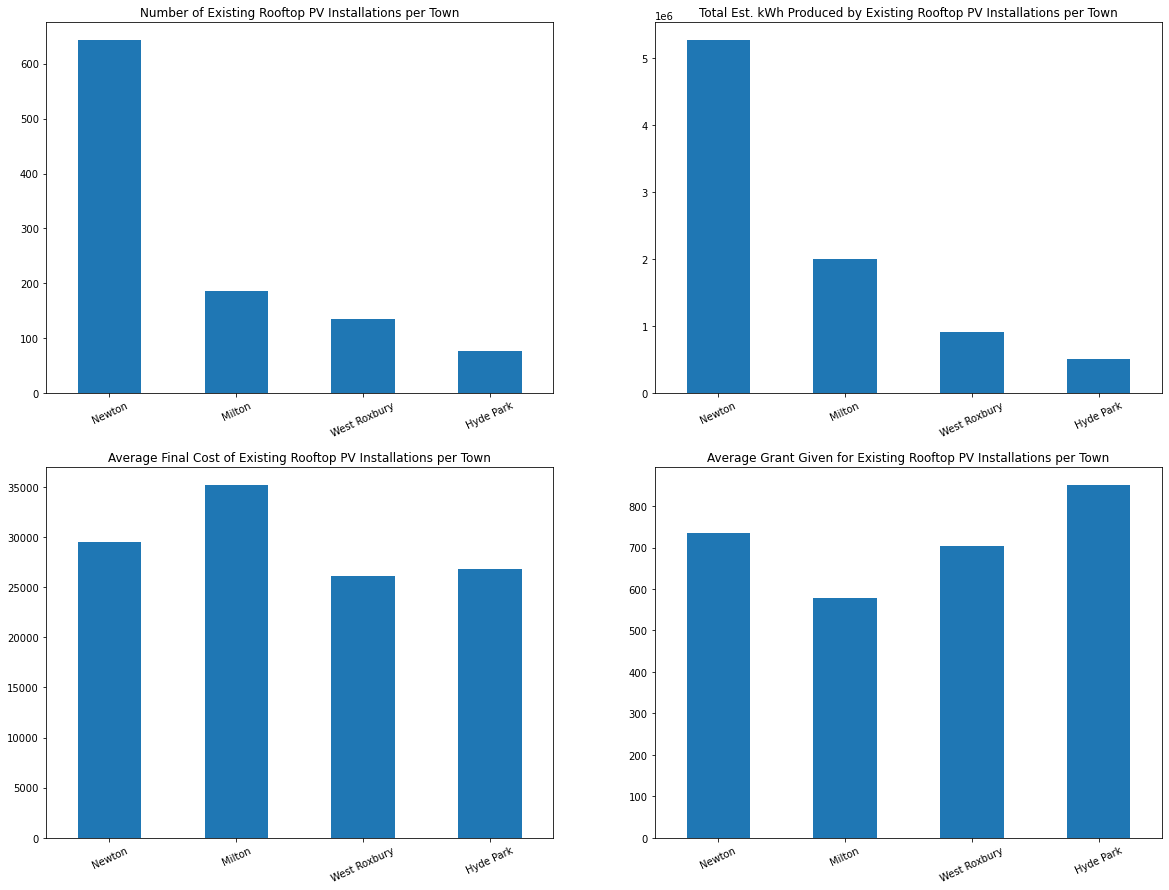

In [39]:
fig1, ax1 = plt.subplots(2, 2)
fig1.set_size_inches(20, 15)

# Plotting N per town

existPVSummary['N'].plot(kind='bar', ax=ax1[0][0])
ax1[0][0].set_xticklabels(labels=ax1[0][0].get_xticklabels(), rotation=25)
ax1[0][0].set_title('Number of Existing Rooftop PV Installations per Town')

# Plotting sumkWhProd per town

existPVSummary['sumkWhProd'].plot(kind='bar', ax=ax1[0][1])
ax1[0][1].set_xticklabels(labels=ax1[0][1].get_xticklabels(), rotation=25)
ax1[0][1].set_title('Total Est. kWh Produced by Existing Rooftop PV Installations per Town')

# Plotting avgFinalCost per town

existPVSummary['avgFinalCost'].plot(kind='bar', ax=ax1[1][0])
ax1[1][0].set_xticklabels(labels=ax1[1][0].get_xticklabels(), rotation=25)
ax1[1][0].set_title('Average Final Cost of Existing Rooftop PV Installations per Town')

# Plotting avgGrant per town

existPVSummary['avgGrant'].plot(kind='bar', ax=ax1[1][1])
ax1[1][1].set_xticklabels(labels=ax1[1][1].get_xticklabels(), rotation=25)
ax1[1][1].set_title('Average Grant Given for Existing Rooftop PV Installations per Town')

# Save image

plt.savefig(outputDir('viz/existingPVBars.png'), dpi=150, format='png')

# *********************** TODO: add bar labels? ******************************

#### Maps

In [26]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
0,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
1,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
2,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [21]:
isolMA = isolMA.set_index(pd.Index(['West Roxbury', 'Newton', 'Milton',
                                    'Hyde Park']))
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Newton,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
Milton,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
Hyde Park,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [22]:
# Don't need some of these columns to merge with existPVSummary

isolMA = isolMA[['CITY_TOWN', 'COUNTY', 'SHAPE_AREA', 
                       'SHAPE_LEN', 'geometry']]
isolMA

,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [23]:
isolMA.to_file(dataDir('MAshape/isolMA.shp'))

In [24]:
townsPV = isolMA.join(existPVSummary)
townsPV

,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89...",135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89...",643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132....",186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89...",77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


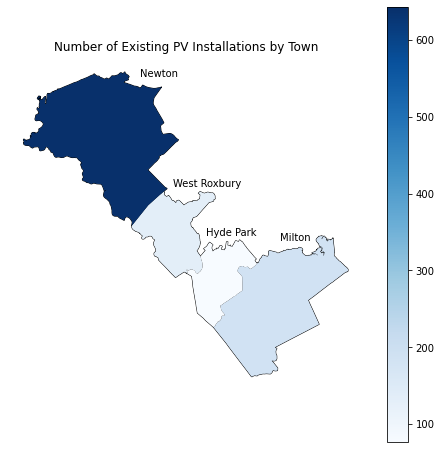

In [25]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8, 8)

townsPV.plot(ax=ax2, color='None', edgecolor='black')
townsPV.plot('N', ax=ax2, cmap='Blues', legend=True)

# Town labels
ax2.text(226000, 901650, 'Newton')
ax2.text(228000, 895000, 'West Roxbury')
ax2.text(230000, 892000, 'Hyde Park')
ax2.text(234500, 891700, 'Milton')

ax2.set_title('Number of Existing PV Installations by Town')
ax2.set_axis_off()

# Save image
plt.savefig(outputDir('viz/existPVNumMap.png'), dpi=150, format='png')

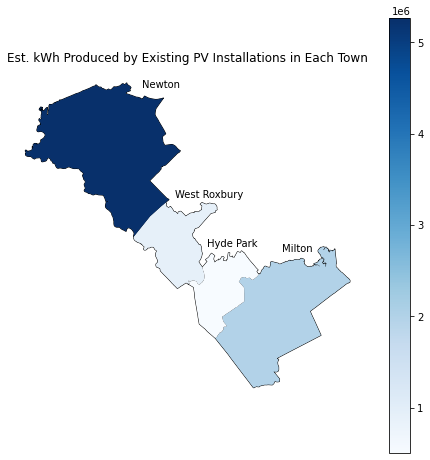

In [26]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8, 8)

townsPV.plot(ax=ax3, color='None', edgecolor='black')
townsPV.plot('sumkWhProd', ax=ax3, cmap='Blues', legend=True)

# Town labels
ax3.text(226000, 901650, 'Newton')
ax3.text(228000, 895000, 'West Roxbury')
ax3.text(230000, 892000, 'Hyde Park')
ax3.text(234500, 891700, 'Milton')

ax3.set_title('Est. kWh Produced by Existing PV Installations in Each Town')
ax3.set_axis_off()

# Save image
plt.savefig(outputDir('viz/existPVkWhMap.png'), dpi=150, format='png')

### Solar Potential

#### How the Towns Compare Overall

In [38]:
isolMA.crs = 'EPSG:26986'

In [39]:
solarshp = isolMA.to_crs('EPSG:4326')           # solar data is in EPSG:4326 
solarshp.to_file(dataDir('MAshape/solar.shp'))  # saving this to use in QGIS

In [40]:
from_filepath = dataDir('irradiation/USA_GISdata_GlobalSolarAtlas/western-hemisphere/GHI.tif')
to_filepath   = dataDir('irradiation/USA_GISdata_GlobalSolarAtlas/western-hemisphere/reprojSolar.tif')

command = ['gdalwarp', 
           '-r', 'average',
            '-te', '-71.300', '42.170', '-71.000', '42.375',
           '-te_srs', 'EPSG:4326',
           '-of', 'GTiff',
           from_filepath, to_filepath]

Popen(command).wait()

In [41]:
solar_file = r_open(to_filepath)
solar = solar_file.read(1).astype(np.float32)

extent = [solar_file.bounds[i] for i in [0, 2, 1, 3]]

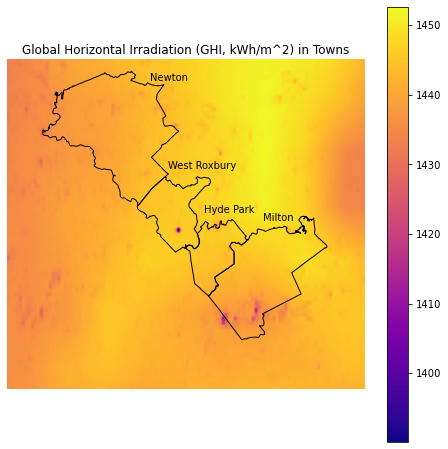

In [42]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(8, 8)

img = ax4.imshow(solar, extent=extent, cmap='plasma')
plt.colorbar(img)

solarshp.plot(ax=ax4, color='None', edgecolor='black')

# Town labels
ax4.text(-71.180, 42.362, 'Newton')
ax4.text(-71.165, 42.307, 'West Roxbury')
ax4.text(-71.135, 42.280, 'Hyde Park')
ax4.text(-71.085, 42.275, 'Milton')

ax4.set_title('Global Horizontal Irradiation (GHI, kWh/m^2) in Towns')
ax4.set_axis_off()

# Save image
plt.savefig(outputDir('viz/GHItowns.png'), dpi=150, format='png')

#### Adding a Rooftop Layer

In [43]:
roofsBoston = gpd.read_file(dataDir('roofprintsBoston/structures_poly_35.shp'))
roofsMilton = gpd.read_file(dataDir('roofprintsMilton/structures_poly_189.shp'))
roofsNewton = gpd.read_file(dataDir('roofprintsNewton/structures_poly_207.shp'))

In [45]:
# Need to isolate just the rooftops in West Roxbury and Hyde Park
# TEMPORARY - while unable to replicate QGIS command in Python:

roofsWRHP   = gpd.read_file(dataDir('intersections/roofprints/roofprintsWRHP.shp')).to_crs('EPSG:4326')
roofsNewton = gpd.read_file(dataDir('intersections/roofprints/roofsprintsNewton.shp')).to_crs('EPSG:4326')
roofsMilton = gpd.read_file(dataDir('intersections/roofprints/roofprintsMilton.shp')).to_crs('EPSG:4326')

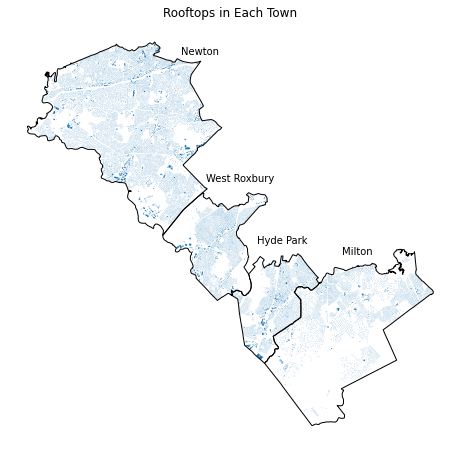

In [47]:
fig5, ax5 = plt.subplots()
fig5.set_size_inches(8, 8)

roofsWRHP.plot(ax=ax5)
roofsNewton.plot(ax=ax5)
roofsMilton.plot(ax=ax5)
solarshp.plot(ax=ax5, color='None', edgecolor='black')

# Town labels
ax5.text(-71.180, 42.362, 'Newton')
ax5.text(-71.165, 42.307, 'West Roxbury')
ax5.text(-71.135, 42.280, 'Hyde Park')
ax5.text(-71.085, 42.275, 'Milton')

ax5.set_title('Rooftops in Each Town')
ax5.set_axis_off()

# Save image
plt.savefig(outputDir('viz/roofs.png'), dpi=150, format='png')

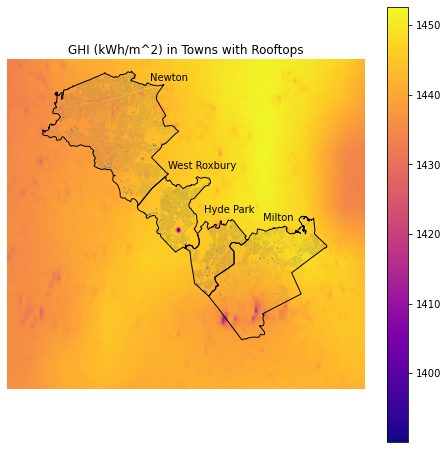

In [48]:
fig6, ax6 = plt.subplots()
fig6.set_size_inches(8, 8)

img = ax6.imshow(solar, extent=extent, cmap='plasma')
plt.colorbar(img)

roofsWRHP.plot(ax=ax6, color='grey')
roofsNewton.plot(ax=ax6, color='grey')
roofsMilton.plot(ax=ax6, color='grey')
solarshp.plot(ax=ax6, color='None', edgecolor='black')

# Town labels
ax6.text(-71.180, 42.362, 'Newton')
ax6.text(-71.165, 42.307, 'West Roxbury')
ax6.text(-71.135, 42.280, 'Hyde Park')
ax6.text(-71.085, 42.275, 'Milton')

ax6.set_title('GHI (kWh/m^2) in Towns with Rooftops')
ax6.set_axis_off()

# Save image
plt.savefig(outputDir('viz/GHItownsRoofs.png'), dpi=150, format='png')

#### Solar Energy Potential per Rooftop

In [94]:
# First, join all the roof layers

roofs = gpd.GeoDataFrame(pd.concat([roofsWRHP, roofsNewton, roofsMilton], 
                                   ignore_index=True), crs=roofsWRHP.crs)
roofs

,STRUCT_ID,SOURCE,SOURCETYPE,SOURCEDATE,SOURCEDATA,MOVED,AREA_SQ_FT,TOWN_ID,TOWN_ID2,TOWN_ID3,...,COMMENTS,SHAPE_AREA,SHAPE_LEN,index,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AR_1,SHAPE_LEN_,geometry
0,228564_891904,City of Boston,None,0,None,None,524.705830,35,0,0,...,None,4.874696e+01,28.159181,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15372 42.27713, -71.15366 42.277..."
1,228744_891768,City of Boston,None,0,None,None,1235.985434,35,0,0,...,None,1.148273e+02,46.526850,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15152 42.27592, -71.15150 42.275..."
2,228721_891681,City of Boston,None,0,None,None,1281.687169,35,0,0,...,None,1.190731e+02,46.638050,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15184 42.27513, -71.15183 42.275..."
3,229467_887834,City of Boston,None,0,None,None,1107.685557,35,0,0,...,None,1.029078e+02,46.288994,Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((-71.14295 42.24045, -71.14295 42.240..."
4,229842_887062,City of Boston,None,0,None,None,1235.355673,35,0,0,...,None,1.147688e+02,58.090992,Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((-71.13836 42.23341, -71.13835 42.233..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65024,232602_889575,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,3318.360000,189,0,0,...,None,3.444044e+07,34990.841095,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,3.082861e+02,86.863620,"POLYGON ((-71.10502 42.25603, -71.10494 42.256..."
65025,233037_889542,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,2043.410000,189,0,0,...,None,3.444044e+07,34990.841095,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,1.898394e+02,71.438004,"POLYGON ((-71.09964 42.25556, -71.09974 42.255..."
65026,233261_889588,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,1100.700000,189,0,0,...,None,3.444044e+07,34990.841095,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,1.022580e+02,41.962124,"POLYGON ((-71.09689 42.25599, -71.09698 42.256..."
65027,234126_889280,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,1562.920000,189,0,0,...,None,3.444044e+07,34990.841095,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,1.452005e+02,49.541960,"POLYGON ((-71.08648 42.25316, -71.08655 42.253..."


<AxesSubplot:>

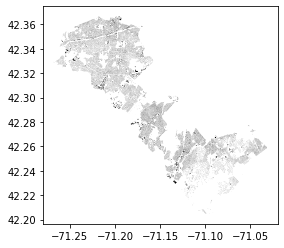

In [67]:
roofs.plot()

In [95]:
path = to_filepath

solarzs    = zonal_stats(roofs, path, stats=['mean'], all_touched=True, nodata=-1)
roofsSolar = pd.DataFrame(solarzs, index=roofs.index)

In [96]:
# Store the zonal stats data in a new column
roofs['MeanGHI_kWh/m^2'] = roofsSolar['mean']

# Recalculate the area of each rooftop in meters squared
roofs['area_sq_m'] = roofs['AREA_SQ_FT'] / 10.764

# Calculate the approximate theoretical potential of each rooftop
roofs['potential_kWh'] = roofs['MeanGHI_kWh/m^2'] * roofs['area_sq_m']
roofs

,STRUCT_ID,SOURCE,SOURCETYPE,SOURCEDATE,SOURCEDATA,MOVED,AREA_SQ_FT,TOWN_ID,TOWN_ID2,TOWN_ID3,...,index,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AR_1,SHAPE_LEN_,geometry,MeanGHI_kWh/m^2,area_sq_m,potential_kWh
0,228564_891904,City of Boston,None,0,None,None,524.705830,35,0,0,...,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15372 42.27713, -71.15366 42.277...",1446.025024,48.746361,70488.457865
1,228744_891768,City of Boston,None,0,None,None,1235.985434,35,0,0,...,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15152 42.27592, -71.15150 42.275...",1446.390015,114.825849,166082.960743
2,228721_891681,City of Boston,None,0,None,None,1281.687169,35,0,0,...,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15184 42.27513, -71.15183 42.275...",1446.390015,119.071643,172224.036030
3,229467_887834,City of Boston,None,0,None,None,1107.685557,35,0,0,...,Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((-71.14295 42.24045, -71.14295 42.240...",1444.197998,102.906499,148617.360029
4,229842_887062,City of Boston,None,0,None,None,1235.355673,35,0,0,...,Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((-71.13836 42.23341, -71.13835 42.233...",1442.738037,114.767342,165579.210248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65024,232602_889575,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,3318.360000,189,0,0,...,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,3.082861e+02,86.863620,"POLYGON ((-71.10502 42.25603, -71.10494 42.256...",1445.293945,308.283166,445559.793419
65025,233037_889542,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,2043.410000,189,0,0,...,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,1.898394e+02,71.438004,"POLYGON ((-71.09964 42.25556, -71.09974 42.255...",1445.659058,189.837421,274440.187191
65026,233261_889588,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,1100.700000,189,0,0,...,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,1.022580e+02,41.962124,"POLYGON ((-71.09689 42.25599, -71.09698 42.256...",1446.025024,102.257525,147866.940206
65027,234126_889280,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,1562.920000,189,0,0,...,Milton,"MILTON, TOWN OF",NORFOLK,13.297527,1.452005e+02,49.541960,"POLYGON ((-71.08648 42.25316, -71.08655 42.253...",1445.659058,145.198811,209907.976062


In [100]:
# ****** TODO: try this for now, check with Prof. Nolte when he returns ******

# Convert kWh to kW over the course of a year (divide by 8760 hours/year)
roofs['potential_kW'] = roofs['potential_kWh'] / 8760

# Assume total energy loss = 11% (3.5% from debris, 7.5% from conversion loss)
roofs['kW'] = roofs['potential_kW'] * 0.89

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [101]:
roofs.columns

Index(['STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT',
       'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 'geometry',
       'MeanGHI_kWh/m^2', 'area_sq_m', 'potential_kWh', 'potential_kW', 'kW'],
      dtype='object')

In [99]:
# Finally, clean up the DataFrame to have just the necessary columns

roofs = roofs[['STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 
               'AREA_SQ_FT', 'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 
               'geometry', 'MeanGHI_kWh/m^2', 'area_sq_m', 'potential_kWh',
               'potential_kW', 'kW'
]]

# roofs.to_file(dataDir('roofsALL/roofsGeometries.shp'))

### Financial Data

#### Block Group Income Data for Areas of Interest

<AxesSubplot:>

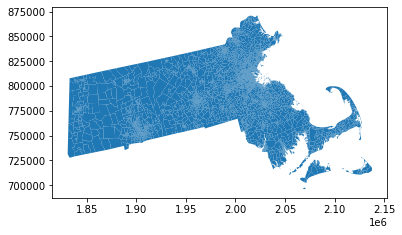

In [51]:
incomeMAshp = gpd.read_file(dataDir('incomeMAShape/MA_blck_grp_2019.shp'))
incomeMAdat = pd.read_csv(dataDir('incomeMA/nhgis0001_ds244_20195_blck_grp.csv'))

incomeMAshp.plot()

In [5]:
incomeMAshp.crs

<Projected CRS: PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GE ...>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [53]:
# Change CRS to EPSG:4326

incomeMAshp = incomeMAshp.to_crs('EPSG:4326')
incomeMAshp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# Save for use in QGIS (below)

incomeMAshp.to_file(dataDir('incomeMAShape/incomeMA_reproj.shp'))

In [54]:
# Isolate just the income block groups in the study locations
# TEMPORARY - while unable to replicate QGIS command in Python:

isolIncomeMAshp = gpd.read_file(dataDir('intersections/income/isolIncome.shp'))

In [55]:
isolIncomeMAshp.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'index', 'CITY_TOWN', 'COUNTY',
       'SHAPE_AR_1', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [56]:
incomeMAdat.columns

Index(['GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATE', 'STATEA',
       'COUNTY', 'COUNTYA', 'COUSUBA', 'PLACEA', 'TRACTA', 'BLKGRPA',
       'CONCITA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITS', 'ANRCA',
       'CBSAA', 'CSAA', 'METDIVA', 'MEMI', 'NECTAA', 'CNECTAA', 'NECTADIVA',
       'UAA', 'CDCURRA', 'SLDUA', 'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA',
       'SDSECA', 'SDUNIA', 'UR', 'PCI', 'PUMA5A', 'GEOID', 'BTTRA', 'BTBGA',
       'NAME_E', 'ALW0E001', 'ALW0E002', 'ALW0E003', 'ALW0E004', 'ALW0E005',
       'ALW0E006', 'ALW0E007', 'ALW0E008', 'ALW0E009', 'ALW0E010', 'ALW0E011',
       'ALW0E012', 'ALW0E013', 'ALW0E014', 'ALW0E015', 'ALW0E016', 'ALW0E017',
       'NAME_M', 'ALW0M001', 'ALW0M002', 'ALW0M003', 'ALW0M004', 'ALW0M005',
       'ALW0M006', 'ALW0M007', 'ALW0M008', 'ALW0M009', 'ALW0M010', 'ALW0M011',
       'ALW0M012', 'ALW0M013', 'ALW0M014', 'ALW0M015', 'ALW0M016', 'ALW0M017'],
      dtype='object')

<AxesSubplot:>

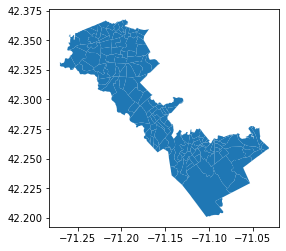

In [70]:
isolIncomeMAshp.plot()

In [57]:
incomeMAdat['GISJOIN'].isin(isolIncomeMAshp['GISJOIN']).sum()

196

In [62]:
isolIncomeMAshp['GISJOIN'].value_counts()

G25002104161021    2
G25002501402012    2
G25002501402011    2
G25002501404003    2
G25002501401024    2
                  ..
G25002104164007    1
G25001703733001    1
G25002501404005    1
G25002501301006    1
G25002104172006    1
Name: GISJOIN, Length: 196, dtype: int64

In [58]:
# Cross-reference the isolated block groups by GISJOIN to get the
# numerical data from the dat file

def filterBlockGroups(blocksShape, blocksDat):
    
    # Create a filter for the matching ids
    f = blocksDat['GISJOIN'].isin(blocksShape['GISJOIN'])
    
    # Apply the filter to the data object & save the matching rows
    filteredDat = blocksDat[f]
    
    # Change the index of the filtered data and shape data to match
    filteredDat = filteredDat.set_index('GISJOIN')
    shapes      = blocksShape.set_index('GISJOIN')
    
    finalData = shapes.join(filteredDat, lsuffix='_shape', rsuffix='_numer')
    return finalData

In [59]:
isolBlocks = filterBlockGroups(isolIncomeMAshp, incomeMAdat)

In [328]:
isolBlocks.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID_shape', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'Shape_Leng', 'Shape_Area', 'index', 'CITY_TOWN', 'COUNTY_shape',
       'SHAPE_AR_1', 'SHAPE_LEN', 'geometry', 'YEAR', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE', 'STATEA', 'COUNTY_numer', 'COUNTYA', 'COUSUBA',
       'PLACEA', 'TRACTA', 'BLKGRPA', 'CONCITA', 'AIANHHA', 'RES_ONLYA',
       'TRUSTA', 'AIHHTLI', 'AITS', 'ANRCA', 'CBSAA', 'CSAA', 'METDIVA',
       'MEMI', 'NECTAA', 'CNECTAA', 'NECTADIVA', 'UAA', 'CDCURRA', 'SLDUA',
       'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA', 'SDSECA', 'SDUNIA', 'UR', 'PCI',
       'PUMA5A', 'GEOID_numer', 'BTTRA', 'BTBGA', 'NAME_E', 'ALW0E001',
       'ALW0E002', 'ALW0E003', 'ALW0E004', 'ALW0E005', 'ALW0E006', 'ALW0E007',
       'ALW0E008', 'ALW0E009', 'ALW0E010', 'ALW0E011', 'ALW0E012', 'ALW0E013',
       'ALW0E014', 'ALW0E015', 'ALW0E016', 'ALW0E017', 'NAME_M', 'ALW0M001',
       'ALW0M00

In [60]:
# Drop unneeded columns

isolBlocks = isolBlocks[['GEOID_shape', 'GEOID_numer', 'STUSAB', 
                         'COUNTY_shape', 'COUNTY_numer', 'TRACTA', 'BLKGRPA', 
                         'NAME_E', 'NAME_M',
                         'ALW0E001', 'ALW0E002', 'ALW0E003', 'ALW0E004',
                         'ALW0E005', 'ALW0E006', 'ALW0E007','ALW0E008',
                         'ALW0E009', 'ALW0E010', 'ALW0E011', 'ALW0E012',
                         'ALW0E013', 'ALW0E014', 'ALW0E015', 'ALW0E016',
                         'ALW0E017', 'ALW0M001', 'ALW0M002', 'ALW0M003',
                         'ALW0M004', 'ALW0M005', 'ALW0M006', 'ALW0M007', 
                         'ALW0M008', 'ALW0M009', 'ALW0M010', 'ALW0M011',            
                         'ALW0M012', 'ALW0M013', 'ALW0M014', 'ALW0M015',
                         'ALW0M016', 'ALW0M017', 'geometry']]

In [103]:
isolBlocks

,GEOID_shape,GEOID_numer,STUSAB,COUNTY_shape,COUNTY_numer,TRACTA,BLKGRPA,NAME_E,NAME_M,ALW0E001,...,ALW0M009,ALW0M010,ALW0M011,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,geometry
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G25001703672002,250173672002,15000US250173672002,MA,MIDDLESEX,Middlesex County,367200,2,"Block Group 2, Census Tract 3672, Middlesex Co...","Block Group 2, Census Tract 3672, Middlesex Co...",427,...,12,12,44,12,12,12,38,45,78,"MULTIPOLYGON (((-71.25601 42.34019, -71.25588 ..."
G25001703684003,250173684003,15000US250173684003,MA,MIDDLESEX,Middlesex County,368400,3,"Block Group 3, Census Tract 3684, Middlesex Co...","Block Group 3, Census Tract 3684, Middlesex Co...",654,...,12,12,91,91,87,61,63,33,25,"POLYGON ((-71.25783 42.35448, -71.25825 42.354..."
G25001703686001,250173686001,15000US250173686001,MA,MIDDLESEX,Middlesex County,368600,1,"Block Group 1, Census Tract 3686, Middlesex Co...","Block Group 1, Census Tract 3686, Middlesex Co...",277,...,12,12,31,44,72,28,12,41,28,"POLYGON ((-71.22707 42.36362, -71.22732 42.363..."
G25001703686004,250173686004,15000US250173686004,MA,MIDDLESEX,Middlesex County,368600,4,"Block Group 4, Census Tract 3686, Middlesex Co...","Block Group 4, Census Tract 3686, Middlesex Co...",758,...,132,18,12,37,80,35,44,86,55,"POLYGON ((-71.24457 42.35843, -71.24484 42.358..."
G25001703687002,250173687002,15000US250173687002,MA,MIDDLESEX,Middlesex County,368700,2,"Block Group 2, Census Tract 3687, Middlesex Co...","Block Group 2, Census Tract 3687, Middlesex Co...",502,...,76,38,30,45,24,81,22,16,43,"MULTIPOLYGON (((-71.21751 42.36645, -71.21834 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G25002501404007,250251404007,15000US250251404007,MA,SUFFOLK,Suffolk County,140400,7,"Block Group 7, Census Tract 1404, Suffolk Coun...","Block Group 7, Census Tract 1404, Suffolk Coun...",452,...,12,43,70,94,103,26,12,40,12,"MULTIPOLYGON (((-71.11908 42.27256, -71.11909 ..."
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,12,12,12,12,"POLYGON ((-71.14065 42.27518, -71.14069 42.274..."
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,12,12,12,12,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ..."


#### From Income Ranges to Weighted Averages

In [61]:
def rangeToAvg(data):
    
    prefix = 'ALW0E0'
    
    # Column names (NHGIS codes) with corresponding income ranges:
    # Note: treating "below $10k" and "above $200k" as "$10k" and "$200k"
    
    totCode = prefix + '01'
    
    incomeCodesRanges = {
        prefix+'02': (9999, 9999),
        prefix+'03': (10000, 14999),
        prefix+'04': (15000, 19999),
        prefix+'05': (20000, 24999),
        prefix+'06': (25000, 29999),
        prefix+'07': (30000, 34999),
        prefix+'08': (35000, 39999),
        prefix+'09': (40000, 44999),
        prefix+'10': (45000, 49999),
        prefix+'11': (50000, 59999),
        prefix+'12': (60000, 74999),
        prefix+'13': (75000, 99999),
        prefix+'14': (100000, 124999),
        prefix+'15': (125000, 149999),
        prefix+'16': (150000, 199999),
        prefix+'17': (200000, 200000)   
    }
    
    # Save the weighted averages in lists to add as new columns to the data:
    
    wAvgs_l = []
    wAvgs_u = []
    
    for index, row in data.iterrows():
        
        wAvg_lower = 0
        wAvg_upper = 0
        
        N = row[totCode]   # total no. of households in ea. block
            
        for code in incomeCodesRanges:
                    
            n = row[code]  # no. in income range
            
            wAvg_lower += n * incomeCodesRanges[code][0]
            wAvg_upper += n * incomeCodesRanges[code][1]
                                    
        
        # Some blocks have no household data:
        
        if(N == 0):
            wAvg_lower = 0
            wAvg_upper = 0
            
        else:
            wAvg_lower = round(wAvg_lower / N, 2)
            wAvg_upper = round(wAvg_upper / N, 2)
            
        wAvgs_l.append(wAvg_lower)
        wAvgs_u.append(wAvg_upper)
    
    return wAvgs_l, wAvgs_u

In [62]:
res = rangeToAvg(isolBlocks)

isolBlocks['wAvgIncome_lower'] = res[0]
isolBlocks['wAvgIncome_upper'] = res[1]

In [332]:
isolBlocks

,GEOID_shape,GEOID_numer,STUSAB,COUNTY_shape,COUNTY_numer,TRACTA,BLKGRPA,NAME_E,NAME_M,ALW0E001,...,ALW0M011,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,geometry,wAvgIncome_lower,wAvgIncome_upper
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G25001703672002,250173672002,15000US250173672002,MA,MIDDLESEX,Middlesex County,367200,2,"Block Group 2, Census Tract 3672, Middlesex Co...","Block Group 2, Census Tract 3672, Middlesex Co...",427,...,44,12,12,12,38,45,78,"MULTIPOLYGON (((-71.25601 42.34019, -71.25588 ...",114964.72,125549.71
G25001703684003,250173684003,15000US250173684003,MA,MIDDLESEX,Middlesex County,368400,3,"Block Group 3, Census Tract 3684, Middlesex Co...","Block Group 3, Census Tract 3684, Middlesex Co...",654,...,91,91,87,61,63,33,25,"POLYGON ((-71.25783 42.35448, -71.25825 42.354...",84617.71,104677.92
G25001703686001,250173686001,15000US250173686001,MA,MIDDLESEX,Middlesex County,368600,1,"Block Group 1, Census Tract 3686, Middlesex Co...","Block Group 1, Census Tract 3686, Middlesex Co...",277,...,31,44,72,28,12,41,28,"POLYGON ((-71.22707 42.36362, -71.22732 42.363...",81389.89,99475.62
G25001703686004,250173686004,15000US250173686004,MA,MIDDLESEX,Middlesex County,368600,4,"Block Group 4, Census Tract 3686, Middlesex Co...","Block Group 4, Census Tract 3686, Middlesex Co...",758,...,12,37,80,35,44,86,55,"POLYGON ((-71.24457 42.35843, -71.24484 42.358...",88786.22,105566.41
G25001703687002,250173687002,15000US250173687002,MA,MIDDLESEX,Middlesex County,368700,2,"Block Group 2, Census Tract 3687, Middlesex Co...","Block Group 2, Census Tract 3687, Middlesex Co...",502,...,30,45,24,81,22,16,43,"MULTIPOLYGON (((-71.21751 42.36645, -71.21834 ...",73316.73,84580.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G25002501404007,250251404007,15000US250251404007,MA,SUFFOLK,Suffolk County,140400,7,"Block Group 7, Census Tract 1404, Suffolk Coun...","Block Group 7, Census Tract 1404, Suffolk Coun...",452,...,70,94,103,26,12,40,12,"MULTIPOLYGON (((-71.11908 42.27256, -71.11909 ...",52488.80,65972.45
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,12,12,"POLYGON ((-71.14065 42.27518, -71.14069 42.274...",0.00,0.00
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,12,12,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ...",0.00,0.00


#### State & Federal Income Tax Estimates

In [64]:
# MA has a flat income tax rate of 5%
# In addition, there are 7 federal tax brackets. Values below assume
# head of household tax brackets in 2019.

def getIncomeTax(data):

    taxMAFactor = 0.05
    taxFedRange = [[0, 13850], [13851, 52850], [52851, 84200], [84201, 160700],
                  [160701, 204700], [204701, 510300], [204701, 510300]]

    taxFedFactors = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
    
    taxesMA  = []
    taxesFed = []
    
    # Using lower weighted average income estimate
    
    for index, row in data.iterrows():
        
        income = row['wAvgIncome_lower']
        
        # MA
        taxMA = round(taxMAFactor * income, 2)
        taxesMA.append(taxMA)
        
        # Federal
        taxFed = 0
        
        for i in range(len(taxFedRange)):
            
            if (income >= taxFedRange[i][0]) & (income <= taxFedRange[i][1]):
                taxFed = round(taxFedFactors[i] * income, 2)
                taxesFed.append(taxFed)
                
    return taxesMA, taxesFed

In [65]:
res = getIncomeTax(isolBlocks)

isolBlocks['stateIncomeTaxesEst'] = res[0]
isolBlocks['fedIncomeTaxesEst']   = res[1]

isolBlocks

,GEOID_shape,GEOID_numer,STUSAB,COUNTY_shape,COUNTY_numer,TRACTA,BLKGRPA,NAME_E,NAME_M,ALW0E001,...,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,geometry,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G25001703672002,250173672002,15000US250173672002,MA,MIDDLESEX,Middlesex County,367200,2,"Block Group 2, Census Tract 3672, Middlesex Co...","Block Group 2, Census Tract 3672, Middlesex Co...",427,...,12,12,38,45,78,"MULTIPOLYGON (((-71.25601 42.34019, -71.25588 ...",114964.72,125549.71,5748.24,27591.53
G25001703684003,250173684003,15000US250173684003,MA,MIDDLESEX,Middlesex County,368400,3,"Block Group 3, Census Tract 3684, Middlesex Co...","Block Group 3, Census Tract 3684, Middlesex Co...",654,...,87,61,63,33,25,"POLYGON ((-71.25783 42.35448, -71.25825 42.354...",84617.71,104677.92,4230.89,20308.25
G25001703686001,250173686001,15000US250173686001,MA,MIDDLESEX,Middlesex County,368600,1,"Block Group 1, Census Tract 3686, Middlesex Co...","Block Group 1, Census Tract 3686, Middlesex Co...",277,...,72,28,12,41,28,"POLYGON ((-71.22707 42.36362, -71.22732 42.363...",81389.89,99475.62,4069.49,17905.78
G25001703686004,250173686004,15000US250173686004,MA,MIDDLESEX,Middlesex County,368600,4,"Block Group 4, Census Tract 3686, Middlesex Co...","Block Group 4, Census Tract 3686, Middlesex Co...",758,...,80,35,44,86,55,"POLYGON ((-71.24457 42.35843, -71.24484 42.358...",88786.22,105566.41,4439.31,21308.69
G25001703687002,250173687002,15000US250173687002,MA,MIDDLESEX,Middlesex County,368700,2,"Block Group 2, Census Tract 3687, Middlesex Co...","Block Group 2, Census Tract 3687, Middlesex Co...",502,...,24,81,22,16,43,"MULTIPOLYGON (((-71.21751 42.36645, -71.21834 ...",73316.73,84580.78,3665.84,16129.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G25002501404007,250251404007,15000US250251404007,MA,SUFFOLK,Suffolk County,140400,7,"Block Group 7, Census Tract 1404, Suffolk Coun...","Block Group 7, Census Tract 1404, Suffolk Coun...",452,...,103,26,12,40,12,"MULTIPOLYGON (((-71.11908 42.27256, -71.11909 ...",52488.80,65972.45,2624.44,6298.66
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,"POLYGON ((-71.14065 42.27518, -71.14069 42.274...",0.00,0.00,0.00,0.00
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ...",0.00,0.00,0.00,0.00


In [66]:
isolBlocks.to_file(dataDir('incomeALL/incomeBlocksGeometries.shp'))

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


#### Visualizing Financial Data

<AxesSubplot:>

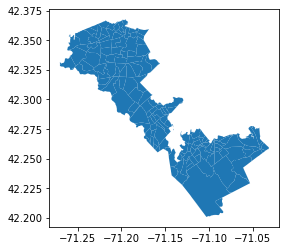

In [67]:
isolBlocks[isolBlocks['wAvgIncome_lower'].gt(0.0)].plot()

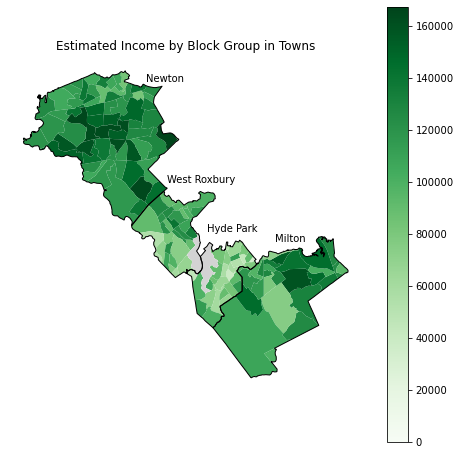

In [338]:
fig7, ax7 = plt.subplots()
fig7.set_size_inches(8, 8)

isolBlocks.plot('wAvgIncome_lower', ax=ax7, cmap='Greens', legend=True)
isolBlocks[isolBlocks['wAvgIncome_lower'].eq(0.0)].plot(ax=ax7, color='lightgray')
isolMA.to_crs('EPSG:4326').plot(ax=ax7, color='None', edgecolor='black')

# Town labels
ax7.text(-71.180, 42.362, 'Newton')
ax7.text(-71.165, 42.307, 'West Roxbury')
ax7.text(-71.135, 42.280, 'Hyde Park')
ax7.text(-71.085, 42.275, 'Milton')

ax7.set_xlabel('Note: grey areas have no income data')
ax7.set_title('Estimated Income by Block Group in Towns')
ax7.set_axis_off()

# Save image
plt.savefig(outputDir('viz/incomeBlocks.png'), dpi=150, format='png')

#### Combining Block Groups & Rooftop Irradiance Data

In [78]:
# roofs = gpd.read_file(dataDir('roofsALL/roofsGeometries.shp'))

In [102]:
# Execute a spatial join of the rooftop/irradiance data and the
# block group income data

joinRoofsBlocks = gpd.sjoin(roofs, isolBlocks, how='left')
joinRoofsBlocks

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,23,33,65,14,50,41,122698.96,143978.48,6134.95,29447.75
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,23,33,65,14,50,41,122698.96,143978.48,6134.95,29447.75
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,23,33,65,14,50,41,122698.96,143978.48,6134.95,29447.75
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,9,50,17,55,31,51,114557.15,131788.90,5727.86,27493.72
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,19,57,38,34,31,35,99979.08,118817.14,4998.95,23994.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65024,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,12,67,27,73,57,65,118273.92,133574.65,5913.70,28385.74
65025,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,85,53,128,40,83,50,97230.77,118835.62,4861.54,23335.38
65026,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,85,53,128,40,83,50,97230.77,118835.62,4861.54,23335.38
65027,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,12,30,22,17,42,64,126930.05,138403.67,6346.50,30463.21


In [103]:
joinRoofsBlocks.columns

Index(['STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT',
       'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 'geometry',
       'MeanGHI_kWh/m^2', 'area_sq_m', 'potential_kWh', 'potential_kW', 'kW',
       'index_right', 'GEOID_shape', 'GEOID_numer', 'STUSAB', 'COUNTY_shape',
       'COUNTY_numer', 'TRACTA', 'BLKGRPA', 'NAME_E', 'NAME_M', 'ALW0E001',
       'ALW0E002', 'ALW0E003', 'ALW0E004', 'ALW0E005', 'ALW0E006', 'ALW0E007',
       'ALW0E008', 'ALW0E009', 'ALW0E010', 'ALW0E011', 'ALW0E012', 'ALW0E013',
       'ALW0E014', 'ALW0E015', 'ALW0E016', 'ALW0E017', 'ALW0M001', 'ALW0M002',
       'ALW0M003', 'ALW0M004', 'ALW0M005', 'ALW0M006', 'ALW0M007', 'ALW0M008',
       'ALW0M009', 'ALW0M010', 'ALW0M011', 'ALW0M012', 'ALW0M013', 'ALW0M014',
       'ALW0M015', 'ALW0M016', 'ALW0M017', 'wAvgIncome_lower',
       'wAvgIncome_upper', 'stateIncomeTaxesEst', 'fedIncomeTaxesEst'],
      dtype='object')

In [104]:
# Remove unnecessary columns

joinRoofsBlocks = joinRoofsBlocks[[
    'STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT',
    'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 'TRACTA', 'BLKGRPA', 
    'NAME_E', 'NAME_M', 'MeanGHI_kWh/m^2', 'area_sq_m', 'potential_kWh', 
    'potential_kW', 'kW', 'wAvgIncome_lower', 'wAvgIncome_upper', 
    'stateIncomeTaxesEst', 'fedIncomeTaxesEst', 'geometry'
]]

### Avoided Emissions

The EPA reported in 2014 that the NEWE region, which includes Massachusetts, has an output emission rate of 954.6 pounds of carbon dioxide equivalent (CO2e) per Mega-Watt hour (MWh) of electricity production and consumption (table 3 of eGRID2014).

In [105]:
joinRoofsBlocks['emAvoided_lbs'] = joinRoofsBlocks['potential_kWh'] * 954.6
joinRoofsBlocks

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,area_sq_m,potential_kWh,potential_kW,kW,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst,geometry,emAvoided_lbs
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,48.746361,70488.457865,8.046628,7.161499,122698.96,143978.48,6134.95,29447.75,"POLYGON ((-71.15372 42.27713, -71.15366 42.277...",6.728828e+07
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,114.825849,166082.960743,18.959242,16.873725,122698.96,143978.48,6134.95,29447.75,"POLYGON ((-71.15152 42.27592, -71.15150 42.275...",1.585428e+08
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,119.071643,172224.036030,19.660278,17.497647,122698.96,143978.48,6134.95,29447.75,"POLYGON ((-71.15184 42.27513, -71.15183 42.275...",1.644051e+08
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,102.906499,148617.360029,16.965452,15.099252,114557.15,131788.90,5727.86,27493.72,"POLYGON ((-71.14295 42.24045, -71.14295 42.240...",1.418701e+08
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,114.767342,165579.210248,18.901736,16.822545,99979.08,118817.14,4998.95,23994.98,"POLYGON ((-71.13836 42.23341, -71.13835 42.233...",1.580619e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65024,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,308.283166,445559.793419,50.862990,45.268061,118273.92,133574.65,5913.70,28385.74,"POLYGON ((-71.10502 42.25603, -71.10494 42.256...",4.253314e+08
65025,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,189.837421,274440.187191,31.328788,27.882622,97230.77,118835.62,4861.54,23335.38,"POLYGON ((-71.09964 42.25556, -71.09974 42.255...",2.619806e+08
65026,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,102.257525,147866.940206,16.879788,15.023011,97230.77,118835.62,4861.54,23335.38,"POLYGON ((-71.09689 42.25599, -71.09698 42.256...",1.411538e+08
65027,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,145.198811,209907.976062,23.962098,21.326267,126930.05,138403.67,6346.50,30463.21,"POLYGON ((-71.08648 42.25316, -71.08655 42.253...",2.003782e+08


In [110]:
# Finally, the data are analysis-ready. Reorder the columns,
# rename those longer than 10 characters, and save to file:

joinRoofsBlocks = joinRoofsBlocks[[
    'STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT',
    'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 'TRACTA', 'BLKGRPA', 
    'NAME_E', 'NAME_M', 'MeanGHI_kWh/m^2', 'area_sq_m', 'potential_kWh', 
    'potential_kW', 'kW', 'wAvgIncome_lower', 'wAvgIncome_upper', 
    'stateIncomeTaxesEst', 'fedIncomeTaxesEst', 'emAvoided_lbs', 'geometry'
]]

joinRoofsBlocks = joinRoofsBlocks.rename(columns={
    'MeanGHI_kWh/m^2': 'GHIkWh/m^2',
    'potential_kWh': 'potent_kWh',
    'potential_kW': 'potent_kW',
    'wAvgIncome_lower': 'wAvgInc_l',
    'wAvgIncome_upper': 'wAvgInc_u',
    'stateIncomeTaxesEst': 'MAIncomeT',
    'fedIncomeTaxesEst': 'fedIncomeT',
    'emAvoided_lbs': 'emAvo_lbs'
})

joinRoofsBlocks.to_file(dataDir('analysisReady/roofsSolarIncomeTaxesEmissions.shp'))

## Analysis of Incentives

Two incentives currently exist for building ownders in Massachusetts to install solar panels on their properties: 

- A 15% state tax credit or \$1,000, whichever value is less, towards the cost of installation; and
- A 26% federal tax credit towards the cost of installation (declining to 22% in 2023 before expiring at the end of the year)

Other options that have so far gone unimplemented in the state include, for example:

- Ongoing (annual) payments or "credits" for the carbon emissions avoided through the use of solar energy to power a building;
    - \$3.00 per Metric ton of CO2e (MTCO2e)
    - \$45.00 per MTCO2e
    - \$120.00 per MTCO2e
- Solar net-metering credits by a state-bsaed utility, for example Eversource

Further permutations exist. For example, the annual payments for carbon emissions avoided, if coming from the state, could have a limited budget (say, \$1 million). On the other hand, perhaps these are executed through a carbon offset exchange service, which would have no budget. 

This analysis will compare the effects of the following incentive programs on rooftop solar adoption:

- The current state tax credit (15\%)
- The current federal tax credit (26\%)
- The 2023 federal tax credit (22\%)
- The 2024 federal tax credit (0\%)
- Annual payments with a budget cap of \$1 million:
    - \$3.00 per MTCO2e
    - \$45.00 per MTCO2e
    - \$120.00 per MTCO2e
- Annual payments without a budget cap (same rates)

#### Estimating Cost of Installation

In [353]:
mean = (2.71 + 1.72) / 2

cond1 = (joinRoofsBlocks['kW'] > 3) & (joinRoofsBlocks['kW'] <= 7)
cond2 = (joinRoofsBlocks['kW'] > 7) & (joinRoofsBlocks['kW'] <= 100)
cond3 = (joinRoofsBlocks['kW'] > 100) & (joinRoofsBlocks['kW'] <= 2000)
cond4 = (joinRoofsBlocks['kW'] <= 3) | (joinRoofsBlocks['kW'] > 2000)

values = [2.71, round(mean, 2), 1.72, 0.00]

joinRoofsBlocks['cost/W'] = np.select([cond1, cond2, cond3, cond4], values,
                                      default=0)

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [354]:
joinRoofsBlocks['PVcostEst'] = (joinRoofsBlocks['kW']*1000) * joinRoofsBlocks['cost/W']
joinRoofsBlocks['PVcostEst'] = round(joinRoofsBlocks['PVcostEst'], 2)

joinRoofsBlocks

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,potential_kWh,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst,geometry,potential_kW,kW,cost/W,PVcostEst
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,70488.457865,122698.96,143978.48,6134.95,29447.75,"POLYGON ((-71.15372 42.27713, -71.15366 42.277...",8.046628,7.161499,2.21,15826.91
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,166082.960743,122698.96,143978.48,6134.95,29447.75,"POLYGON ((-71.15152 42.27592, -71.15150 42.275...",18.959242,16.873725,2.21,37290.93
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,172224.036030,122698.96,143978.48,6134.95,29447.75,"POLYGON ((-71.15184 42.27513, -71.15183 42.275...",19.660278,17.497647,2.21,38669.80
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,148617.360029,114557.15,131788.90,5727.86,27493.72,"POLYGON ((-71.14295 42.24045, -71.14295 42.240...",16.965452,15.099252,2.21,33369.35
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,165579.210248,99979.08,118817.14,4998.95,23994.98,"POLYGON ((-71.13836 42.23341, -71.13835 42.233...",18.901736,16.822545,2.21,37177.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65024,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,445559.793419,118273.92,133574.65,5913.70,28385.74,"POLYGON ((-71.10502 42.25603, -71.10494 42.256...",50.862990,45.268061,2.21,100042.42
65025,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,274440.187191,97230.77,118835.62,4861.54,23335.38,"POLYGON ((-71.09964 42.25556, -71.09974 42.255...",31.328788,27.882622,2.21,61620.59
65026,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,147866.940206,97230.77,118835.62,4861.54,23335.38,"POLYGON ((-71.09689 42.25599, -71.09698 42.256...",16.879788,15.023011,2.21,33200.85
65027,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,209907.976062,126930.05,138403.67,6346.50,30463.21,"POLYGON ((-71.08648 42.25316, -71.08655 42.253...",23.962098,21.326267,2.21,47131.05


#### When is PV Installation Economical?

In [355]:
# Need to compare with existing PV installations in each town

# Load data from saved file
existPV = pd.read_csv(outputDir('existingPVSummary.csv'), index_col=0)
existPV

,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
Newton,643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
West Roxbury,135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Hyde Park,77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


In [356]:
meanCostNewton = existPV.loc['Newton', 'avgFinalCost']
meanCostMilton = existPV.loc['Milton', 'avgFinalCost']
meanCostWR     = existPV.loc['West Roxbury', 'avgFinalCost']
meanCostHP     = existPV.loc['Hyde Park', 'avgFinalCost']

In [357]:
# Does this make sense for the rooftop data?
# For example, are there any for whom the mean cost is still >= annual income?

print(len(joinRoofsBlocks[joinRoofsBlocks['wAvgIncome_lower'].le(meanCostNewton) & 
                          joinRoofsBlocks['index'].eq('Newton')]))

print(len(joinRoofsBlocks[joinRoofsBlocks['wAvgIncome_lower'].le(meanCostMilton) & 
                          joinRoofsBlocks['index'].eq('Milton')]))

print(len(joinRoofsBlocks[joinRoofsBlocks['wAvgIncome_lower'].le(meanCostWR) & 
                          joinRoofsBlocks['index'].eq('West Roxbury')]))

print(len(joinRoofsBlocks[joinRoofsBlocks['wAvgIncome_lower'].le(meanCostHP) & 
                          joinRoofsBlocks['index'].eq('Hyde Park')]))

# Yes: 6 in West Roxbury and 46 in Hyde Park (none in Newton or Milton)

0
0
6
46


In [358]:
# Locate those roofs

iWR  = joinRoofsBlocks['wAvgIncome_lower'].le(meanCostWR)
iWR &= joinRoofsBlocks['index'].eq('West Roxbury')

iHP  = joinRoofsBlocks['wAvgIncome_lower'].le(meanCostHP)
iHP &= joinRoofsBlocks['index'].eq('Hyde Park')

In [359]:
notEcon = joinRoofsBlocks.loc[iWR | iHP]
notEcon

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,potential_kWh,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst,geometry,potential_kW,kW,cost/W,PVcostEst
65,230358_891515,City of Boston,35,0,None,66.706708,4.440987,Hyde Park,BOSTON,SUFFOLK,...,8.963574e+03,0.0,0.0,0.0,0.0,"POLYGON ((-71.13197 42.27352, -71.13199 42.273...",1.023239,0.910683,0.00,0.00
127,229996_889080,City of Boston,35,0,Bos_1812172000_B8,768.752695,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.031952e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13643 42.25162, -71.13648 42.251...",11.780273,10.484443,2.21,23170.62
156,229386_891779,City of Boston,35,0,None,7833.626557,5.350249,West Roxbury,BOSTON,SUFFOLK,...,1.052095e+06,0.0,0.0,0.0,0.0,"POLYGON ((-71.14360 42.27586, -71.14360 42.275...",120.102197,106.890955,1.72,183852.44
1005,229894_888818,City of Boston,35,0,Bos_1812172000_B0,36240.718972,4.440987,Hyde Park,BOSTON,SUFFOLK,...,4.862391e+06,0.0,0.0,0.0,0.0,"POLYGON ((-71.13739 42.24954, -71.13735 42.249...",555.067435,494.010017,1.72,849697.23
1034,230010_889056,City of Boston,35,0,Bos_1812172000_B6,1373.677764,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.843986e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13638 42.25146, -71.13637 42.251...",21.050071,18.734563,2.21,41403.38
1035,229814_888968,City of Boston,35,0,Bos_1812172000_B7,1013.932292,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.360730e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13863 42.25062, -71.13872 42.250...",15.533450,13.824771,2.21,30552.74
1094,230397_891439,City of Boston,35,0,Bos_1806105000_B1,314.517947,4.440987,Hyde Park,BOSTON,SUFFOLK,...,4.226269e+04,0.0,0.0,0.0,0.0,"POLYGON ((-71.13147 42.27283, -71.13148 42.272...",4.824508,4.293812,2.71,11636.23
1395,229388_891738,City of Boston,35,0,None,10380.792114,5.350249,West Roxbury,BOSTON,SUFFOLK,...,1.394192e+06,0.0,0.0,0.0,0.0,"POLYGON ((-71.14371 42.27540, -71.14374 42.275...",159.154375,141.647393,1.72,243633.52
2104,230313_891149,City of Boston,35,0,None,258.548293,4.440987,Hyde Park,BOSTON,SUFFOLK,...,3.472433e+04,0.0,0.0,0.0,0.0,"POLYGON ((-71.13251 42.27023, -71.13251 42.270...",3.963965,3.527928,2.71,9560.69
3293,230038_888735,City of Boston,35,0,None,114.478058,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.535944e+04,0.0,0.0,0.0,0.0,"POLYGON ((-71.13598 42.24848, -71.13600 42.248...",1.753360,1.560491,0.00,0.00


In [360]:
# Many of these rooftops are actually too small to merit intalling a PV
# system (<1 kW of production)

notEcon = notEcon[notEcon['kW'].ge(1.00)]
notEcon

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,potential_kWh,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst,geometry,potential_kW,kW,cost/W,PVcostEst
127,229996_889080,City of Boston,35,0,Bos_1812172000_B8,768.752695,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.031952e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13643 42.25162, -71.13648 42.251...",11.780273,10.484443,2.21,23170.62
156,229386_891779,City of Boston,35,0,None,7833.626557,5.350249,West Roxbury,BOSTON,SUFFOLK,...,1.052095e+06,0.0,0.0,0.0,0.0,"POLYGON ((-71.14360 42.27586, -71.14360 42.275...",120.102197,106.890955,1.72,183852.44
1005,229894_888818,City of Boston,35,0,Bos_1812172000_B0,36240.718972,4.440987,Hyde Park,BOSTON,SUFFOLK,...,4.862391e+06,0.0,0.0,0.0,0.0,"POLYGON ((-71.13739 42.24954, -71.13735 42.249...",555.067435,494.010017,1.72,849697.23
1034,230010_889056,City of Boston,35,0,Bos_1812172000_B6,1373.677764,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.843986e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13638 42.25146, -71.13637 42.251...",21.050071,18.734563,2.21,41403.38
1035,229814_888968,City of Boston,35,0,Bos_1812172000_B7,1013.932292,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.360730e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13863 42.25062, -71.13872 42.250...",15.533450,13.824771,2.21,30552.74
1094,230397_891439,City of Boston,35,0,Bos_1806105000_B1,314.517947,4.440987,Hyde Park,BOSTON,SUFFOLK,...,4.226269e+04,0.0,0.0,0.0,0.0,"POLYGON ((-71.13147 42.27283, -71.13148 42.272...",4.824508,4.293812,2.71,11636.23
1395,229388_891738,City of Boston,35,0,None,10380.792114,5.350249,West Roxbury,BOSTON,SUFFOLK,...,1.394192e+06,0.0,0.0,0.0,0.0,"POLYGON ((-71.14371 42.27540, -71.14374 42.275...",159.154375,141.647393,1.72,243633.52
2104,230313_891149,City of Boston,35,0,None,258.548293,4.440987,Hyde Park,BOSTON,SUFFOLK,...,3.472433e+04,0.0,0.0,0.0,0.0,"POLYGON ((-71.13251 42.27023, -71.13251 42.270...",3.963965,3.527928,2.71,9560.69
3293,230038_888735,City of Boston,35,0,None,114.478058,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.535944e+04,0.0,0.0,0.0,0.0,"POLYGON ((-71.13598 42.24848, -71.13600 42.248...",1.753360,1.560491,0.00,0.00
5399,230232_888700,City of Boston,35,0,Bos_1812030000_B0,7432.617494,4.440987,Hyde Park,BOSTON,SUFFOLK,...,9.974815e+05,0.0,0.0,0.0,0.0,"POLYGON ((-71.13351 42.24808, -71.13369 42.248...",113.867757,101.342304,1.72,174308.76


In [320]:
# Some of those remaining are too small for our cost estimates from NREL

notEcon = notEcon[notEcon['PVcostEst'].gt(0.00)]

# Still leaves 27: what are the incomes?

notEcon[['wAvgIncome_lower', 'PVcostEst']] 

,wAvgIncome_lower,PVcostEst
127,0.0,23170.62
156,0.0,183852.44
1005,0.0,849697.23
1034,0.0,41403.38
1035,0.0,30552.74
1094,0.0,11636.23
1395,0.0,243633.52
2104,0.0,9560.69
5399,0.0,174308.76
6896,0.0,21362.81


In [322]:
# These are the roofs in the blocks that had no income data - filled with 0.0

isolBlocks[isolBlocks['wAvgIncome_lower'].eq(0.0)]

,GEOID_shape,GEOID_numer,STUSAB,COUNTY_shape,COUNTY_numer,TRACTA,BLKGRPA,NAME_E,NAME_M,ALW0E001,...,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,geometry,wAvgIncome_lower,wAvgIncome_upper,stateIncomeTaxesEst,fedIncomeTaxesEst
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G25002500005024,250250005024,15000US250250005024,MA,MIDDLESEX,Suffolk County,502,4,"Block Group 4, Census Tract 5.02, Suffolk Coun...","Block Group 4, Census Tract 5.02, Suffolk Coun...",0,...,12,12,12,12,12,"MULTIPOLYGON (((-71.16469 42.33376, -71.16478 ...",0.0,0.0,0.0,0.0
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,"POLYGON ((-71.14065 42.27518, -71.14069 42.274...",0.0,0.0,0.0,0.0
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ...",0.0,0.0,0.0,0.0
G25002509810001,250259810001,15000US250259810001,MA,SUFFOLK,Suffolk County,981000,1,"Block Group 1, Census Tract 9810, Suffolk Coun...","Block Group 1, Census Tract 9810, Suffolk Coun...",0,...,12,12,12,12,12,"POLYGON ((-71.12988 42.29806, -71.12989 42.298...",0.0,0.0,0.0,0.0
G25002509811001,250259811001,15000US250259811001,MA,SUFFOLK,Suffolk County,981100,1,"Block Group 1, Census Tract 9811, Suffolk Coun...","Block Group 1, Census Tract 9811, Suffolk Coun...",0,...,12,12,12,12,12,"MULTIPOLYGON (((-71.10933 42.27446, -71.10948 ...",0.0,0.0,0.0,0.0


In [368]:
# Establish a general threshold for the % of income that a system would cost,
# based on existing installation data

avgIncomeHP = joinRoofsBlocks[joinRoofsBlocks['index'].eq('Hyde Park')]['wAvgIncome_lower'].mean()
avgIncomeWR = joinRoofsBlocks[joinRoofsBlocks['index'].eq('West Roxbury')]['wAvgIncome_lower'].mean()
avgIncomeM  = joinRoofsBlocks[joinRoofsBlocks['index'].eq('Milton')]['wAvgIncome_lower'].mean()
avgIncomeN  = joinRoofsBlocks[joinRoofsBlocks['index'].eq('Newton')]['wAvgIncome_lower'].mean()

print(round((meanCostHP / avgIncomeHP), 2) * 100)
print(round((meanCostWR / avgIncomeWR), 2) * 100)
print(round((meanCostMilton / avgIncomeM), 2) * 100)
print(round((meanCostNewton / avgIncomeN), 2) * 100)

print('mean %: ' + str((33 + 26 + 29 + 23) / 4))

33.0
26.0
28.999999999999996
23.0
mean %: 27.75


In [ ]:
# Obviously, there are multiple criteria for when rooftop PV installation is
# both practical and economical:

# 1. At least 1 kW of estimated yearly production
# 2. The final cost is not greater than ~ 28% of annual income
# 3. For rooftops in the same town as those that have existing installations,
#    the average cost of those existing systems can be used as a benchmark

### State & Federal Tax Incentives

#### Calculations

In [369]:
# MA tax credit: 15% (up to $1000)

cond1 = (joinRoofsBlocks['stateIncomeTaxesEst'] * 0.15) < 1000
cond2 = (joinRoofsBlocks['stateIncomeTaxesEst'] * 0.15) >= 1000

values = [joinRoofsBlocks['stateIncomeTaxesEst'] * 0.15, 1000]

joinRoofsBlocks['incentMA'] = np.select([cond1, cond2], values, default=0)

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [370]:
# Current federal tax credit: 26%
joinRoofsBlocks['incentFed22'] = joinRoofsBlocks['fedIncomeTaxesEst'] * 0.26

# 2023 federal tax credit: 22%
joinRoofsBlocks['incentFed23'] = joinRoofsBlocks['fedIncomeTaxesEst'] * 0.22

# 2024 federal tax credit: 0%
joinRoofsBlocks['incentFed24'] = joinRoofsBlocks['fedIncomeTaxesEst'] * 0

In [372]:
# Final cost of installation with the incentives

inc = ['incentMA', 'incentFed22', 'incentFed23', 'incentFed24']

joinRoofsBlocks['PVcostMA']       = joinRoofsBlocks['PVcostEst'] - joinRoofsBlocks['incentMA']
joinRoofsBlocks['PVcostMA+Fed22'] = joinRoofsBlocks['PVcostEst'] - (joinRoofsBlocks['incentMA'] + joinRoofsBlocks['incentFed22'])
joinRoofsBlocks['PVcostMA+Fed23'] = joinRoofsBlocks['PVcostEst'] - (joinRoofsBlocks['incentMA'] + joinRoofsBlocks['incentFed23'])
joinRoofsBlocks['PVcostMA+Fed24'] = joinRoofsBlocks['PVcostEst'] - (joinRoofsBlocks['incentMA'] + joinRoofsBlocks['incentFed24'])

joinRoofsBlocks

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,cost/W,PVcostEst,incentMA,incentFed22,incentFed23,incentFed24,PVcostMA+Fed22,PVcostMA+Fed23,PVcostMA+Fed24,PVcostMA
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,2.21,15826.91,920.2425,7656.4150,6478.5050,0.0,7250.2525,8428.1625,14906.6675,14906.6675
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,2.21,37290.93,920.2425,7656.4150,6478.5050,0.0,28714.2725,29892.1825,36370.6875,36370.6875
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,2.21,38669.80,920.2425,7656.4150,6478.5050,0.0,30093.1425,31271.0525,37749.5575,37749.5575
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,2.21,33369.35,859.1790,7148.3672,6048.6184,0.0,25361.8038,26461.5526,32510.1710,32510.1710
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,2.21,37177.83,749.8425,6238.6948,5278.8956,0.0,30189.2927,31149.0919,36427.9875,36427.9875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65024,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,100042.42,887.0550,7380.2924,6244.8628,0.0,91775.0726,92910.5022,99155.3650,99155.3650
65025,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,61620.59,729.2310,6067.1988,5133.7836,0.0,54824.1602,55757.5754,60891.3590,60891.3590
65026,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,33200.85,729.2310,6067.1988,5133.7836,0.0,26404.4202,27337.8354,32471.6190,32471.6190
65027,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,47131.05,951.9750,7920.4346,6701.9062,0.0,38258.6404,39477.1688,46179.0750,46179.0750


In [373]:
joinRoofsBlocks.columns

Index(['STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT',
       'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 'TRACTA', 'BLKGRPA',
       'NAME_E', 'NAME_M', 'MeanGHI_kWh/m^2', 'area_sq_m', 'potential_kWh',
       'wAvgIncome_lower', 'wAvgIncome_upper', 'stateIncomeTaxesEst',
       'fedIncomeTaxesEst', 'geometry', 'potential_kW', 'kW', 'cost/W',
       'PVcostEst', 'incentMA', 'incentFed22', 'incentFed23', 'incentFed24',
       'PVcostMA+Fed22', 'PVcostMA+Fed23', 'PVcostMA+Fed24', 'PVcostMA'],
      dtype='object')

In [408]:
def selections_stateFed(data, scenario_texts):
    
    data_c = data.copy()
    
    # Select those roofs where the final cost of PV installation is less than 
    # 28% of income
    incs  = ['incentFed22', 'incentFed23', 'incentFed24']
    costs = ['PVcostMA+Fed22', 'PVcostMA+Fed23', 'PVcostMA+Fed24']
    
    N = []
    A = []
    M = []
    E = []
    C_M  = []
    C_F  = []
    C_I  = []
    mC_I = []
    
    for i in range(3):
        i_sel = data_c[costs[i]].lt(data_c['wAvgIncome_lower']*0.28)
        
        selected = data_c[i_sel]
    
        # Count how many roofs were selected
        n = len(selected)
        N.append(n)
    
        # Compute the total area of those roofs in square kilometers
        area = round(selected['area_sq_m'].sum() / 1000000, 2)
        A.append(area)
    
        # Compute the total MW generated by installing PV on those roofs
        MW = round(selected['kW'].sum() * 0.001, 2)
        M.append(MW)
    
        # Compute the total emissions saved by installing PV on those roofs
        # TODO
        em = 0.0  # placeholder
        E.append(em)
    
        # Compute the total cost for the state
        costMA = round(selected['incentMA'].sum(), 2)
        C_M.append(costMA)
        
        # Compute the total cost for the fed. govt.
        costF = round(selected[incs[i]].sum(), 2)
        C_F.append(costF)
    
        # Compute the total cost for the building owners
        costInd = round(selected['PVcostMA'].sum(), 2)
        C_I.append(costInd)
    
        # Compute the average cost for the building owners
        meanCostInd = round(selected['PVcostMA'].mean(), 2)
        mC_I.append(meanCostInd)
    
    
    results = pd.DataFrame(zip(N, A, M, E, C_M, C_F, C_I, mC_I),
                          columns=['n', 'area_km^2', 'MW', 'avoidedMTCO2e',
                                   'costForMA', 'costForFed', 
                                   'costForIndividuals',
                                   'avgCostForIndividuals'],
                          index=scenario_texts)
    
    return results

In [409]:
selections_stateFed(joinRoofsBlocks, ['MA+FedIncent22', 'MA+FedIncent23', 
                                     'MA+FedIncent24'])

,n,area_km^2,MW,avoidedMTCO2e,costForMA,costForFed,costForIndividuals,avgCostForIndividuals
MA+FedIncent22,35968,2.83,415.16,0.0,30835011.82,2.698142e+08,7.968242e+08,22153.70
MA+FedIncent23,34664,2.66,390.59,0.0,29704500.61,2.198629e+08,7.436308e+08,21452.54
MA+FedIncent24,27161,1.78,260.96,0.0,23134621.42,0.000000e+00,4.634945e+08,17064.71


In [1]:
joinRoofsBlocks.drop(columns='PVcostMA')
joinRoofsBlocks

NameError: name 'joinRoofsBlocks' is not defined

In [291]:
# TODO: 
#   1. Delete PVcostMA column (same as PVcostMA+Fed24) & the corresponding method
#   2. Calculate emissions avoided by installing PV on each rooftop
#   3. Add incentive sources to README: https://www.masscec.com/solar-incentives-and-programs
#   4. When plotting rooftops w/ solar bc of incentives, remember to plot
#      roofs w/ costEst = 0 w/ neutral color as "no cost data" (eg. Tasmania)
#   5. Plot both income & existing solar installations on same map?
#   6. plot $ per kWh produced by existing installations?
#   7. remove axes from maps?
#   8. Redo bar plots (2.2.1) to fit on a single page
#   9. Redo QGIS intersections in Python (2.3.2, )
#   8. net metering as another incentive program?